# Concatenation of .csv files

---

**Updated on:** 2023-09-14

> Authors: Simon Knoblauch (simon.knoblauch@student.uni-tuebingen.de)  
> Input file(s): folder of .csv files to be concatenated  
> Output file(s): concatenated .csv file  
> Dependencies: pandas, pathlib

**Please read the comments before proceeding to run the code and let us know if you run into any errors or find undocumented pieces of code.**

## Importing Dependencies

In [13]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import ipympl
%matplotlib widget

## User Input

In [3]:
# Input Folder containing all .csv spot files with the ending "spotlist.csv".
input_folder=Path(r"output")

# Folder that the output should be saved to.
output_folder=Path(r"output")

## Code

,row_letter,row,column,x_coord,y_coord,radius,hough_peak_int,min_griddist,note,halo_rad,x+y,x-y,spot_intensity
0,A,1,1,104,76,20,0.550000,3.306218,kept,NaN,180,28,0.526767
1,A,1,2,209,78,21,0.296875,5.382195,kept,NaN,287,131,0.373394
2,A,1,3,307,89,25,0.319444,8.647855,kept,NaN,396,218,0.336259
3,A,1,4,406,84,21,NaN,0.000000,backfilled,NaN,490,322,0.328327
4,A,1,5,514,87,20,0.308333,8.482186,kept,NaN,601,427,0.326783
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,L,12,16,599,1349,22,NaN,0.000000,backfilled,NaN,1948,-750,0.321946
236,L,12,17,699,1352,20,0.316667,3.423818,kept,NaN,2051,-653,0.322001
237,L,12,18,800,1355,22,0.273438,7.031170,kept,NaN,2155,-555,0.325755
238,L,12,19,904,1350,20,0.433333,2.861790,kept,NaN,2254,-446,0.347187


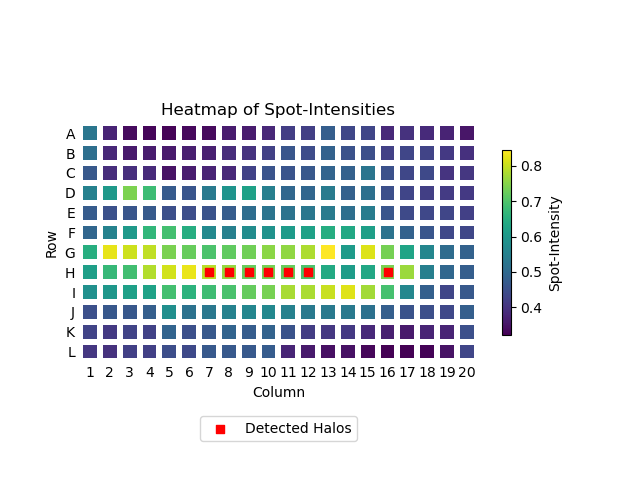

In [16]:
# Create empty output DataFrame
concat_df=pd.DataFrame()

# Loop over all files in the folder that should be concatenated.
for file in input_folder.glob("*spotlist.csv"):
    current_df=pd.read_csv(file,index_col=0)
    # Concatenate the files.
    concat_df=pd.concat([concat_df,current_df],ignore_index=True)

# Sort by row and column.
concat_df.sort_values(["row","column"],inplace=True,ignore_index=True)

# Write to file.
output_filename=output_folder / Path(input_folder.name+"_concat.csv")
concat_df.to_csv(output_filename)

heatmap=concat_df.pivot_table(index="row_letter",columns="column",values="spot_intensity")

fig,ax=plt.subplots()
htmp=ax.pcolormesh(heatmap.iloc[::-1],edgecolors="white",linewidth=4)
ax.set(title="Heatmap of Spot-Intensities",
          aspect="equal",
          ylabel="Row",
          xlabel="Column",
          yticks=np.array(range(1,len(heatmap)+1))-0.5,
          xticks=np.array(range(1,len(heatmap.columns)+1))-0.5,
          yticklabels=heatmap.index[::-1],
          xticklabels=heatmap.columns
          )
ax.spines[["right","left","top","bottom"]].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.scatter(concat_df.loc[concat_df["halo_rad"]>0,"column"]-0.5,concat_df["row"].max()-concat_df.loc[concat_df["halo_rad"]>0,"row"]+0.5,marker="s", c="red",label="Detected Halos")
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True,ncol=5)
fig.colorbar(htmp,ax=ax,label="Spot-Intensity",shrink=0.5)
concat_df